In [8]:
import torch
from torch.autograd import Variable
from torch import nn

import numpy as np

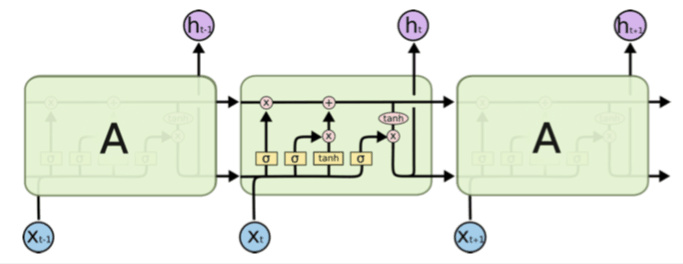

\begin{split}\begin{array}{ll}
i_t = \sigma(W_{ii} x_t + b_{ii} + W_{hi} h_{(t-1)} + b_{hi}) \\
f_t = \sigma(W_{if} x_t + b_{if} + W_{hf} h_{(t-1)} + b_{hf}) \\
g_t = \tanh(W_{ig} x_t + b_{ig} + W_{hg} h_{(t-1)} + b_{hg}) \\
o_t = \sigma(W_{io} x_t + b_{io} + W_{ho} h_{(t-1)} + b_{ho}) \\
c_t = f_t c_{(t-1)} + i_t g_t \\
h_t = o_t \tanh(c_t)
\end{array}\end{split}

`class torch.nn.LSTM(input_size, hidden_size, num_layers, bias, batch_first, dropout, bidirectional)`

Parameters:	
* input_size – $x_{t}$的特征维度，也就是词向量的长度
* hidden_size – 隐含层也就是h的size
* num_layers – 使用几层RNN
* bias – 是否添加偏置
* batch_first – 是否input和output使用(batch, seq, feature)的形式
* dropout – dropout的比例，默认是0
* bidirectional – 是否使用双向RNN

初始化后的对象：

* Inputs: input, (h_0, c_0)
* Outputs: output, (h_n, c_n)

In [14]:
# 这里只使用RNN()，因为基本只用这个类，而不用RNNCell
lstm_seq = nn.LSTM(100, 200)

In [15]:
print('输入到隐层的权值: ', lstm_seq.weight_ih_l0.shape)
print('上一个时刻状态到下一个时刻的权值: ', lstm_seq.weight_hh_l0.shape)

输入到隐层的权值:  torch.Size([800, 100])
上一个时刻状态到下一个时刻的权值:  torch.Size([800, 200])


这里之所以权值这么为800，是因为有4个门，所以4 * 200 

In [16]:
# 构造一个序列，长为 6，batch 是 5， 特征是 100
x = Variable(torch.randn(6, 5, 100)) # 这是 rnn 的输入格式：
                                     # (num_step, batchsize, word)也就是(选取的序列长度，每次批量的大小，和词向量的大小)

In [17]:
output, (state, memory) = lstm_seq(x)

In [18]:
print('output: ', np.shape(output),'\nstate: ', np.shape(state),'\nmemory: ', np.shape(memory) )

output:  torch.Size([6, 5, 200]) 
state:  torch.Size([1, 5, 200]) 
memory:  torch.Size([1, 5, 200])


堆叠多个的情况可以参考basicRNN